In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from collections import defaultdict
from sklearn import linear_model
import json

In [53]:
rating_data = pd.read_csv("ratings_export.csv")

In [54]:
rating_data

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof
...,...,...,...,...
11078162,6239f4f1a936b95600b3d798,alien-3,6,turnitip
11078163,6239f4f1a936b95600b3d799,battleship-potemkin,7,turnitip
11078164,6239f4f1a936b95600b3d79e,pusher,6,turnitip
11078165,6239f4f1a936b95600b3d7a1,wild-strawberries,7,turnitip


We have 11078167 reviews.

In [55]:
movie_data = pd.read_csv("movie_data.csv", on_bad_lines='skip')

In [56]:
movie_data = movie_data.drop(["genres", "image_url", "imdb_id", "spoken_languages", "tmdb_id", "tmdb_link", "vote_average", "vote_count", "imdb_link"], axis = 1)

In [57]:
movie_data

,_id,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,year_released
0,5fc85f606758f69634496fd3,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,1971.0
1,5fc85ff26758f696344ace0c,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,1960.0
2,5fc85f606758f69634496fcd,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,1953.0
3,5fc85f606758f69634496fd1,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,1911.0
4,5fc85f606758f69634496fd4,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,2018.0
...,...,...,...,...,...,...,...,...,...,...
285958,6239f32da936b95600b301d8,the-western-world-of-sailor-moon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285959,6239f32da936b95600b301e8,shadowplay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285960,6239f32da936b95600b301f2,only-always-you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285961,6239f32da936b95600b301fb,one-night-stand-ellen-degeneres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
user_data = pd.read_csv("users_export.csv")

In [59]:
user_data

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy
...,...,...,...,...,...
8134,6239b430a936b956009c993c,Máté Turi-Mészáros,NaN,237,mateazember
8135,6239cbf7a936b95600a2d24c,Finn,NaN,297,finnvor1
8136,6239d254a936b95600a4472f,Daniel,NaN,1231,daniel
8137,6239df37a936b95600aa7aa5,ButterflyFilms,NaN,800,butterflyfilms


In [60]:
ratings_movies = pd.merge(rating_data, movie_data, on='movie_id', how='left')

In [61]:
ratings_movies = ratings_movies.drop(["_id_y"], axis=1)

In [62]:
ratings_movies

,_id_x,movie_id,rating_val,user_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,year_released
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof,Feast,en,This Oscar-winning animated short film tells t...,9.260,"[""United States of America""]",2014-10-25,6.0,2014.0
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof,Loving,en,"The story of Richard and Mildred Loving, an in...",18.024,"[""United Kingdom"",""United States of America""]",2016-11-04,123.0,2016.0
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof,Scripted Content,en,A very short film for Vogue starring Jessica C...,1.400,"[""United States of America""]",2014-06-01,2.0,2014.0
3,5fc57c5d6758f6963451a060,the-future,4,deathproof,The Future,en,When a couple decides to adopt a stray cat the...,5.208,"[""Germany"",""United States of America"",""France""...",2011-07-29,91.0,2011.0
4,5fc57c5c6758f69634519398,mank,5,deathproof,Mank,en,1930s Hollywood is reevaluated through the eye...,16.331,"[""United States of America""]",2020-11-13,132.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11080238,6239f4f1a936b95600b3d798,alien-3,6,turnitip,Alien³,en,After escaping with Newt and Hicks from the al...,22.524,"[""United Kingdom"",""United States of America""]",1992-05-22,114.0,1992.0
11080239,6239f4f1a936b95600b3d799,battleship-potemkin,7,turnitip,Battleship Potemkin,ru,A dramatized account of a great Russian naval ...,8.771,"[""Soviet Union""]",1925-12-24,75.0,1925.0
11080240,6239f4f1a936b95600b3d79e,pusher,6,turnitip,Pusher,da,A drug pusher grows increasingly desperate aft...,6.615,"[""Denmark""]",1996-08-30,105.0,1996.0
11080241,6239f4f1a936b95600b3d7a1,wild-strawberries,7,turnitip,Wild Strawberries,sv,Crotchety retired doctor Isak Borg travels fro...,13.574,"[""Sweden""]",1957-12-26,91.0,1957.0


In [63]:
review_count = ratings_movies.groupby(['movie_id']).size().reset_index(name='review_count')
avg_ratings = ratings_movies.groupby('movie_id')['rating_val'].mean().reset_index(name='avg_rating')
movie_metrics = pd.merge(avg_ratings, review_count, on='movie_id')
movie_data = pd.merge(movie_data, movie_metrics, on='movie_id', how='left')

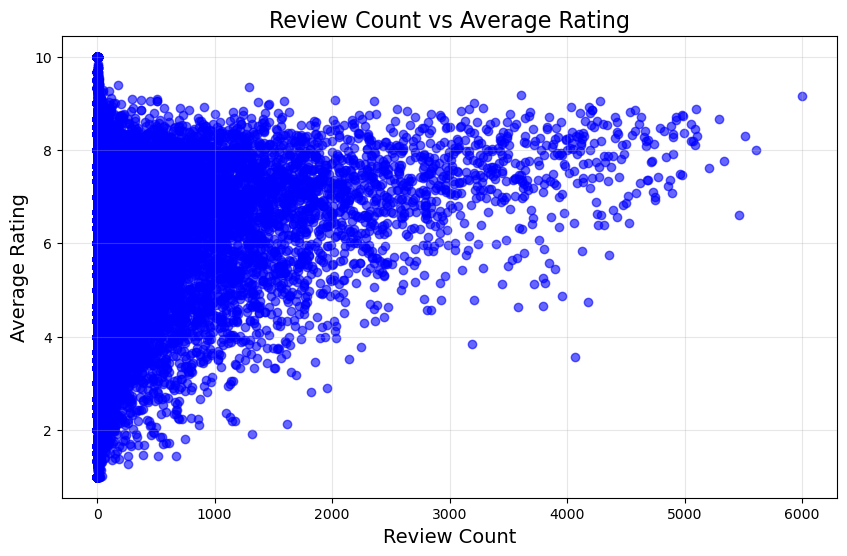

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    movie_data['review_count'],
    movie_data['avg_rating'],
    alpha=0.6,
    color='blue'
)
plt.title("Review Count vs Average Rating", fontsize=16)
plt.xlabel("Review Count", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

### Notes
- Could be interesting to use average rating as a feature as users are able to see that before they make a rating, and this could influence their rating
- I think that we should start by using a similar model to assignment 2. We can look at collaborative filtering approaches soley based on user to user comparisons
- Then once we add in features potentially using a factorization model, we can see how these interactions can potentially improve our model. 
- Other features that we could potentially use are run time, genre, release date etc, to see how these decisions may impact a user's rating. 
- I feel like doing something like this will be sufficient to demostrate a deeper understanding of the material covered, rather than just what we did in assignment1. 